In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\suman\\Downloads\\FDI data.csv")

In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None


In [5]:

print(df.head())

                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [6]:
# Check for missing values
print(df.isnull().sum())

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


In [7]:
# Reshape the dataframe to a long format for easier analysis
df_melted = df.melt(id_vars=["Sector"], var_name="Year", value_name="FDI")

In [8]:
# Convert 'Year' to a string and extract the starting year for analysis
df_melted['Year'] = df_melted['Year'].astype(str).apply(lambda x: int(x.split('-')[0]))


In [9]:
# Exploratory Data Analysis (EDA)
print("\nBasic Statistical Description:")
print(df_melted.describe())


Basic Statistical Description:
              Year          FDI
count  1071.000000  1071.000000
mean   2008.000000   309.982250
std       4.901268   819.037233
min    2000.000000     0.000000
25%    2004.000000     3.140000
50%    2008.000000    37.940000
75%    2012.000000   213.740000
max    2016.000000  8684.070000


In [10]:
# Year-wise analysis of FDI
yearly_fdi = df_melted.groupby('Year')['FDI'].sum().reset_index()

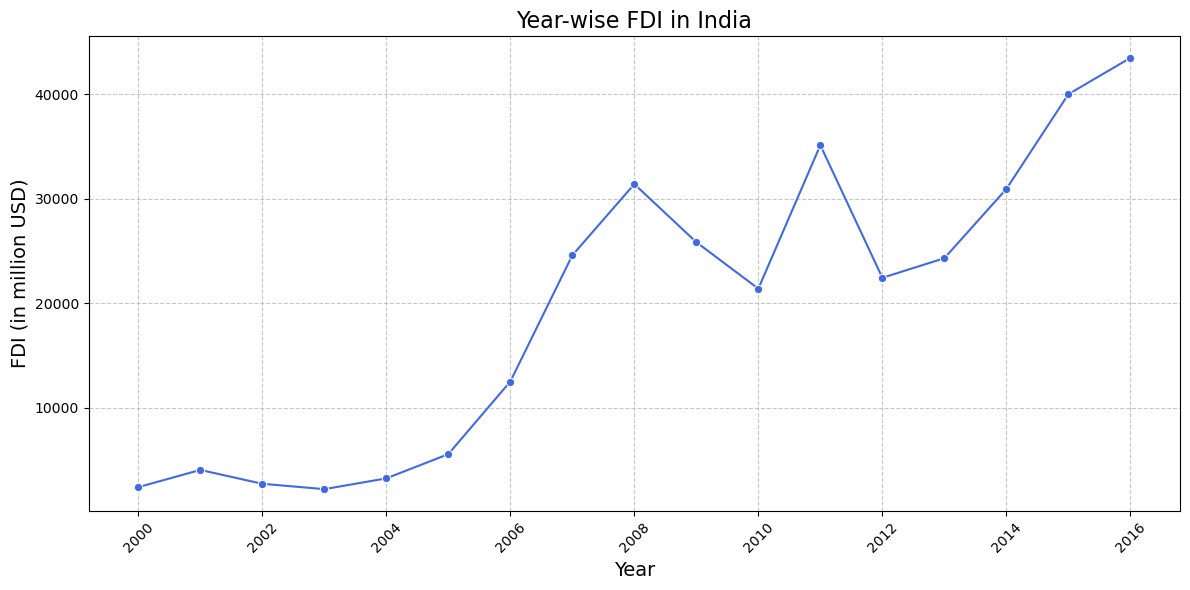

In [12]:
# Visualization: Year-wise FDI trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_fdi, x='Year', y='FDI', marker='o', color='royalblue')
plt.title('Year-wise FDI in India', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FDI (in million USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Sector-wise analysis of FDI
sector_fdi = df_melted.groupby('Sector')['FDI'].sum().reset_index().sort_values(by='FDI', ascending=False)


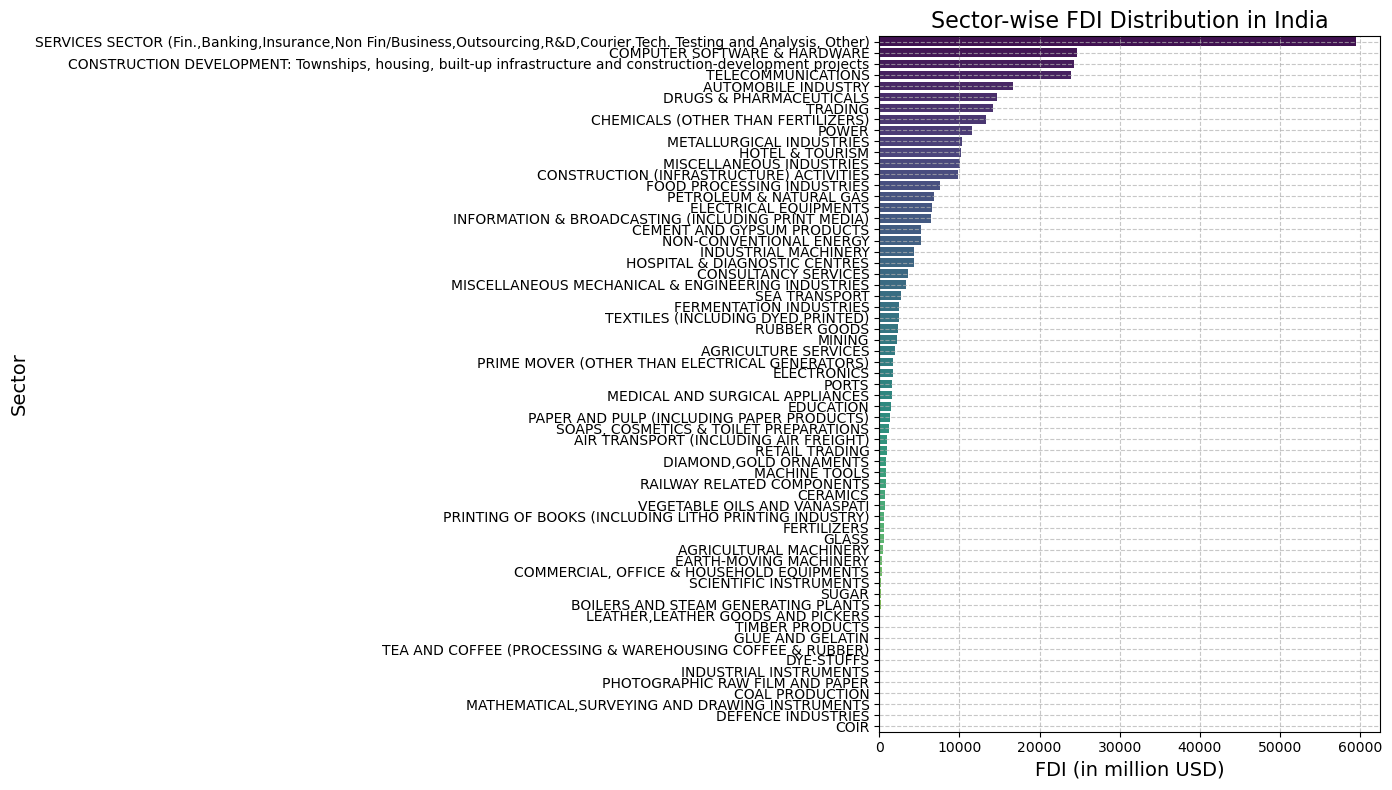

In [14]:
# Visualization: Sector-wise FDI distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=sector_fdi, x='FDI', y='Sector', hue='Sector', palette='viridis', dodge=False)
plt.title('Sector-wise FDI Distribution in India', fontsize=16)
plt.xlabel('FDI (in million USD)', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:

# Interactive Visualization using Plotly
fig = px.bar(sector_fdi, x='FDI', y='Sector', title='Sector-wise FDI Distribution in India', orientation='h', color='Sector', template='plotly')
fig.update_layout(
    xaxis_title='FDI (in million USD)',
    yaxis_title='Sector',
    title={'x':0.5, 'xanchor': 'center'},
    showlegend=False
)
fig.show()

In [16]:
# Correlation Analysis
numeric_columns = df_melted[['Year', 'FDI']]
correlation_matrix = numeric_columns.corr()

In [17]:

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Year       FDI
Year  1.000000  0.243318
FDI   0.243318  1.000000


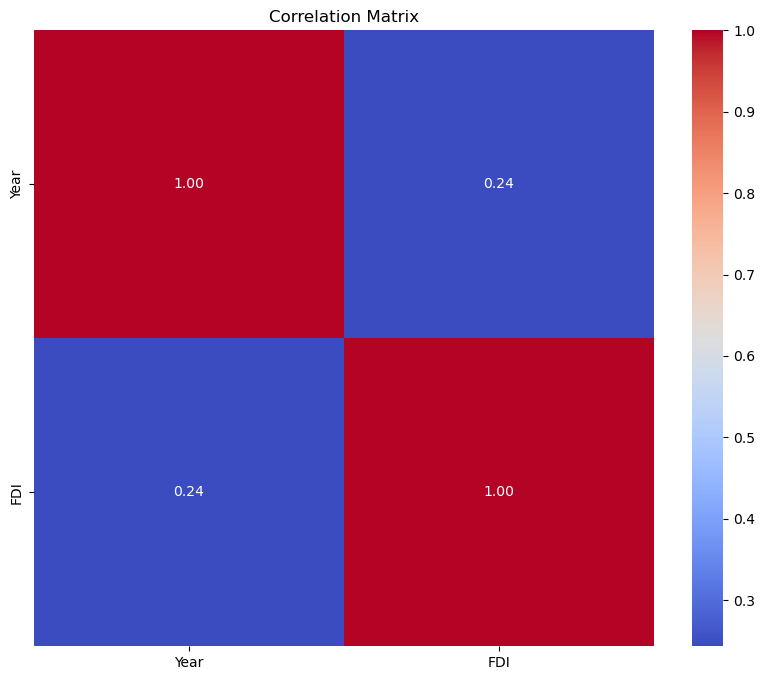

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Linear Regression 
slope, intercept, r_value, p_value, std_err = linregress(yearly_fdi['Year'], yearly_fdi['FDI'])
print(f"\nLinear Regression Results:\nSlope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")


Linear Regression Results:
Slope: 2561.5883333333336, Intercept: -5124140.491568628, R-squared: 0.8273538110725627


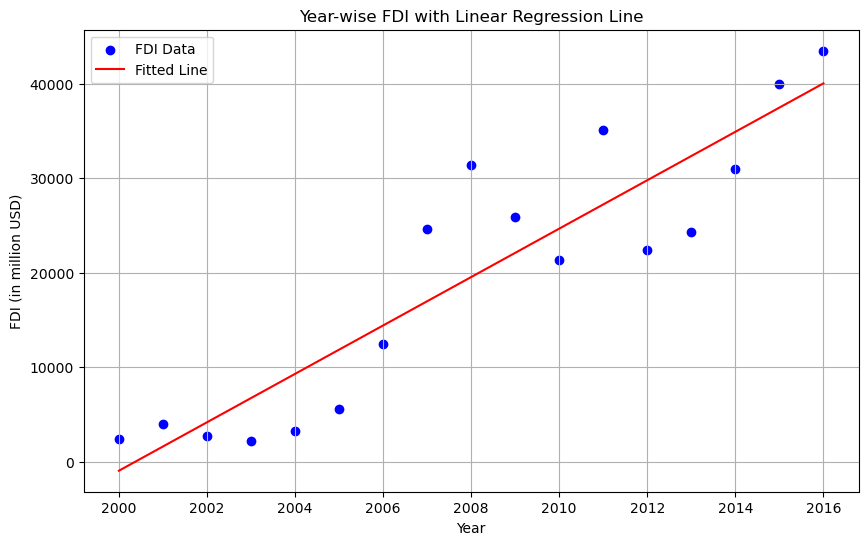

In [20]:
# Plotting Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(yearly_fdi['Year'], yearly_fdi['FDI'], color='blue', label='FDI Data')
plt.plot(yearly_fdi['Year'], intercept + slope * yearly_fdi['Year'], color='red', label='Fitted Line')
plt.title('Year-wise FDI with Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('FDI (in million USD)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Summary and Insights
print("\nSummary and Insights:")
print(f"The total FDI in the given period is {df_melted['FDI'].sum()} million USD.")
print(f"The sector with the highest FDI is {sector_fdi.iloc[0]['Sector']} with {sector_fdi.iloc[0]['FDI']} million USD.")
print(f"The year with the highest FDI is {yearly_fdi.loc[yearly_fdi['FDI'].idxmax()]['Year']} with {yearly_fdi['FDI'].max()} million USD.")
print(f"The correlation between Year and FDI is {correlation_matrix.loc['Year', 'FDI']}.")
print(f"The R-squared value of the linear regression between Year and FDI is {r_value**2}.")


Summary and Insights:
The total FDI in the given period is 331990.99 million USD.
The sector with the highest FDI is SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other) with 59476.49 million USD.
The year with the highest FDI is 2016.0 with 43478.26 million USD.
The correlation between Year and FDI is 0.24331764798511532.
The R-squared value of the linear regression between Year and FDI is 0.8273538110725627.
